In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### P1. 본 실습에서 사용한 데이터를 활용하여 MLE를 활용한 log-likelihood linear regression 코드를 작성

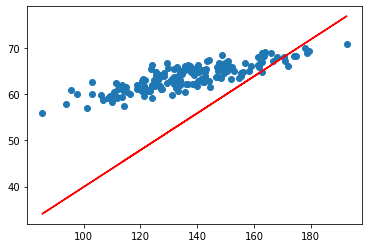

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

class LinearRegression:
    def fit(self, X, Y):
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)
        self.parameter_cache = []
        self.W = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    def predict(self, X):
        product = np.matmul(np.array(X).reshape(-1,1), self.W)
        return product.reshape(-1)
    
reg = LinearRegression()
x = data['Weight']
y = data['Height']
params = reg.fit(x[:-180], y[:-180])
pred = reg.predict(np.array(x[-180:]))
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred, 'red')
plt.savefig('plot_fit_mle.png')

### P2. 본 실습에서 사용한 데이터에 MLE와 gradient 기반 linear regression을 각각 적용하여 결과 비교

- **MLE 기반 linear regression**

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

class LinearRegression:
    def fit(self, X, Y):
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)
        self.parameter_cache = []
        self.W = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    def predict(self, X):
        product = np.matmul(np.array(X).reshape(-1,1), self.W)
        return product.reshape(-1)
    
reg = LinearRegression()
x = data['Weight']
y = data['Height']
params = reg.fit(x[:-180], y[:-180])
pred = reg.predict(np.array(x[-180:]))

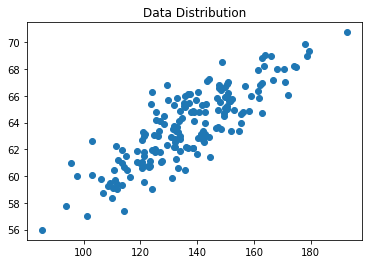

In [4]:
plt.scatter(x[-180:], y[-180:])
plt.title("Data Distribution")
plt.savefig('plot_raw_data.png')

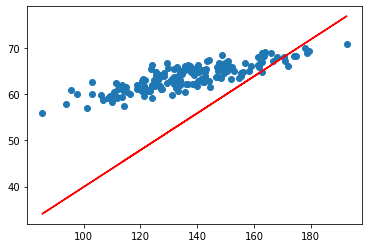

In [5]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred, 'red')
plt.savefig('plot_fit_mle.png')

- **Gradient 기반 linear regression**

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

class LinearRegression:
    def fit(self, X, Y):
        X = np.array(X).reshape(1, -1)
        Y = np.array(Y).reshape(1, -1)
        x_shape = X.shape
        num_var = x_shape[0]
        self.parameter_cache = []
        self.weight = np.random.normal(0,1,(num_var,1))
        self.bias = np.random.rand(1)
        self.num_iteration = 50
        
        for t in range(self.num_iteration):
            N = x_shape[1]
            self.delta_W = 2/N*(np.sum(np.multiply(((np.matmul(self.weight, X)+self.bias)-Y), X)))
            self.delta_bias = 2/N*(np.sum(((np.matmul(self.weight, X)+self.bias)-Y)))
            self.weight -= 0.1*self.delta_W
            self.bias -= 0.1*self.delta_bias
            self.parameter_cache.append(np.array((self.weight, self.bias)))
    
        return self.weight, self.bias, self.parameter_cache
    
    def predict(self, X, idx):
        product = np.matmul(self.parameter_cache[idx][0], np.array(X).reshape(1,-1))+self.parameter_cache[idx][1]
        return product.reshape(-1)
    
reg = LinearRegression()

x = data['Weight']
y = data['Height']

params = reg.fit(x[:-180], y[:-180])
pred0 = reg.predict(np.array(x[-180:]), 0)
pred1 = reg.predict(np.array(x[-180:]), 9)
pred2 = reg.predict(np.array(x[-180:]), 19)
pred3 = reg.predict(np.array(x[-180:]), 29)
pred4 = reg.predict(np.array(x[-180:]), 39)
pred5 = reg.predict(np.array(x[-180:]), 49)

/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_14163/2162254059.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.weight, self.bias)))


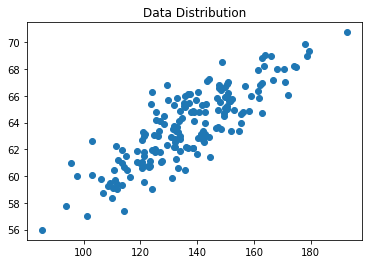

In [7]:
plt.scatter(x[-180:], y[-180:])
plt.title("Data Distribution")
plt.savefig('plot_raw_data.png')

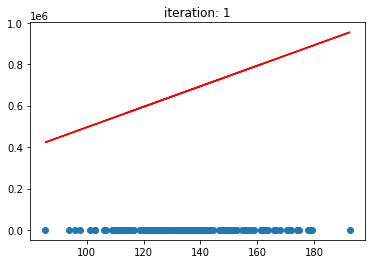

In [8]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred0, 'red')
plt.title("iteration: 1")
plt.savefig('plot_fit_gradient1.png')

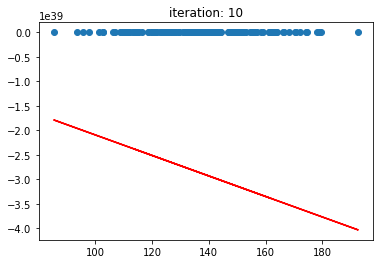

In [9]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred1, 'red')
plt.title("iteration: 10")
plt.savefig('plot_fit_gradient2.png')

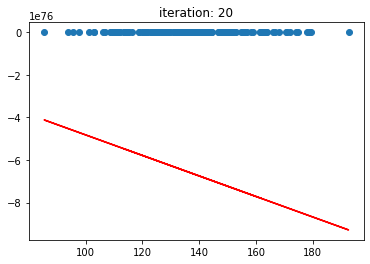

In [10]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred2, 'red')
plt.title("iteration: 20")
plt.savefig('plot_fit_gradient3.png')

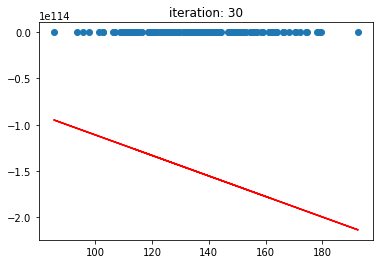

In [11]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred3, 'red')
plt.title("iteration: 30")
plt.savefig('plot_fit_gradient4.png')

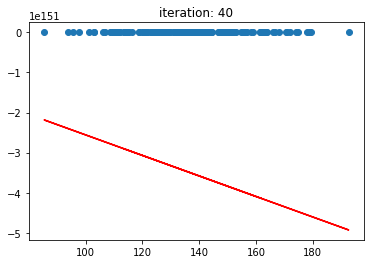

In [12]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred4, 'red')
plt.title("iteration: 40")
plt.savefig('plot_fit_gradient5.png')

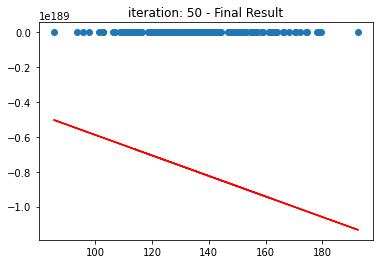

In [13]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred5, 'red')
plt.title("iteration: 50 - Final Result")
plt.savefig('plot_fit_gradient6.png')

### P3. 본 실습에서 사용한 raw 데이터를 min-max normalization, Z-score normalization 각각 적용하고 비교

- **Raw 데이터**

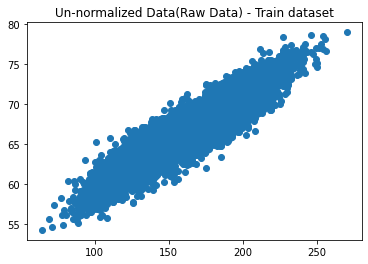

In [38]:
plt.scatter(x[:-180], y[:-180])
plt.title("Un-normalized Data(Raw Data) - Train dataset")
plt.savefig('raw_data_train.png')

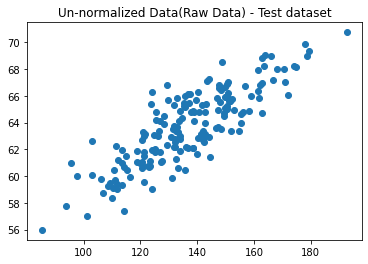

In [39]:
plt.scatter(x[-180:], y[-180:])
plt.title("Un-normalized Data(Raw Data) - Test dataset")
plt.savefig('raw_data_test.png')

- **Raw 데이터에 min-max normalization 적용**

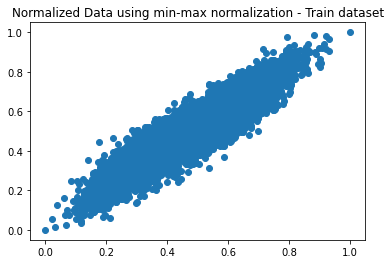

In [40]:
x = (data['Weight']-data['Weight'].min()) / (data['Weight'].max() - data['Weight'].min())
y = (data['Height']-data['Height'].min()) / (data['Height'].max() - data['Height'].min())

plt.scatter(x[:-180], y[:-180])
plt.title("Normalized Data using min-max normalization - Train dataset")
plt.savefig('min_max_train.png')

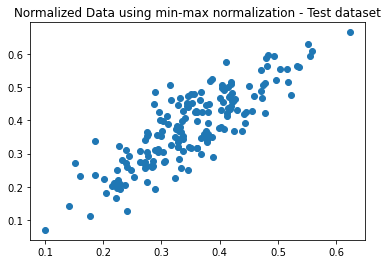

In [41]:
x = (data['Weight']-data['Weight'].min()) / (data['Weight'].max() - data['Weight'].min())
y = (data['Height']-data['Height'].min()) / (data['Height'].max() - data['Height'].min())

plt.scatter(x[-180:], y[-180:])
plt.title("Normalized Data using min-max normalization - Test dataset")
plt.savefig('min_max_test.png')

- **Raw 데이터에 Z-score normalization 적용**

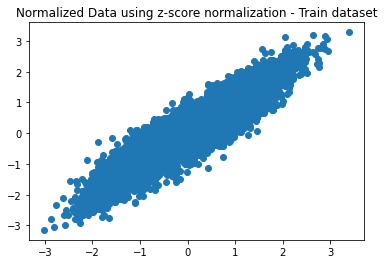

In [42]:
x = (data['Weight']-data['Weight'].mean())/data['Weight'].std()
y = (data['Height']-data['Height'].mean())/data['Height'].std()

plt.scatter(x[:-180], y[:-180])
plt.title("Normalized Data using z-score normalization - Train dataset")
plt.savefig('z_score_train.png')

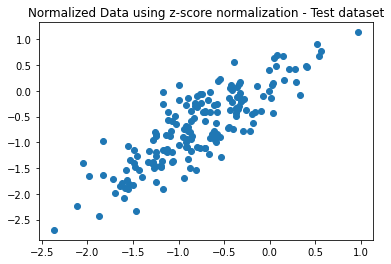

In [43]:
x = (data['Weight']-data['Weight'].mean())/data['Weight'].std()
y = (data['Height']-data['Height'].mean())/data['Height'].std()

plt.scatter(x[-180:], y[-180:])
plt.title("Normalized Data using z-score normalization - Test dataset")
plt.savefig('z_score_test.png')

### Min-max normalization 기법을 적용한 MLE 기반 linear regression

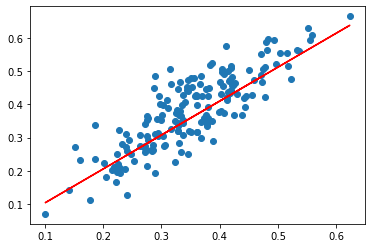

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

class LinearRegression:
    def fit(self, X, Y):
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)
        self.parameter_cache = []
        self.W = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    def predict(self, X):
        product = np.matmul(np.array(X).reshape(-1,1), self.W)
        return product.reshape(-1)

reg = LinearRegression()
x = (data['Weight']-data['Weight'].min()) / (data['Weight'].max() - data['Weight'].min())
y = (data['Height']-data['Height'].min()) / (data['Height'].max() - data['Height'].min())
params = reg.fit(x[:-180], y[:-180])
pred = reg.predict(np.array(x[-180:]))

plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred, 'red')
plt.savefig('plot_fit_mle_minmax.png')

### Z-score normalization 기법을 적용한 MLE 기반 linear regression

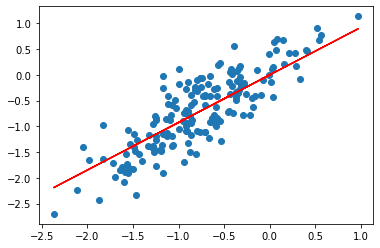

In [18]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

class LinearRegression:
    def fit(self, X, Y):
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)
        self.parameter_cache = []
        self.W = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    def predict(self, X):
        product = np.matmul(np.array(X).reshape(-1,1), self.W)
        return product.reshape(-1)
    
reg = LinearRegression()
x = (data['Weight']-data['Weight'].mean())/data['Weight'].std()
y = (data['Height']-data['Height'].mean())/data['Height'].std()
params = reg.fit(x[:-180], y[:-180])
pred = reg.predict(np.array(x[-180:]))

plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred, 'red')
plt.savefig('plot_fit_mle_zscore.png')

### Min-max normalization 기법을 적용한 gradient 기반 linear regression

In [19]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

class LinearRegression:
    def fit(self, X, Y):
        X = np.array(X).reshape(1, -1)
        Y = np.array(Y).reshape(1, -1)
        x_shape = X.shape
        num_var = x_shape[0]
        self.parameter_cache = []
        self.weight = np.random.normal(0,1,(num_var,1))
        self.bias = np.random.rand(1)
        self.num_iteration = 50
        
        for t in range(self.num_iteration):
            N = x_shape[1]
            self.delta_W = 2/N*(np.sum(np.multiply(((np.matmul(self.weight, X)+self.bias)-Y), X)))
            self.delta_bias = 2/N*(np.sum(((np.matmul(self.weight, X)+self.bias)-Y)))
            self.weight -= 0.1*self.delta_W
            self.bias -= 0.1*self.delta_bias
            self.parameter_cache.append(np.array((self.weight, self.bias)))
    
        return self.weight, self.bias, self.parameter_cache
    
    def predict(self, X, idx):
        product = np.matmul(self.parameter_cache[idx][0], np.array(X).reshape(1,-1))+self.parameter_cache[idx][1]
        return product.reshape(-1)
    
reg = LinearRegression()

x = (data['Weight']-data['Weight'].min()) / (data['Weight'].max() - data['Weight'].min())
y = (data['Height']-data['Height'].min()) / (data['Height'].max() - data['Height'].min())

params = reg.fit(x[:-180], y[:-180])
pred0 = reg.predict(np.array(x[-180:]), 0)
pred1 = reg.predict(np.array(x[-180:]), 9)
pred2 = reg.predict(np.array(x[-180:]), 19)
pred3 = reg.predict(np.array(x[-180:]), 29)
pred4 = reg.predict(np.array(x[-180:]), 39)
pred5 = reg.predict(np.array(x[-180:]), 49)
    

/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_14163/1416600788.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.weight, self.bias)))


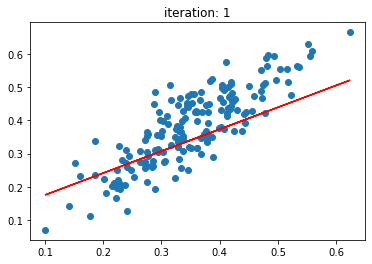

In [20]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred0, 'red')
plt.title("iteration: 1")
plt.savefig('plot_fit_gradient1_minmax.png')

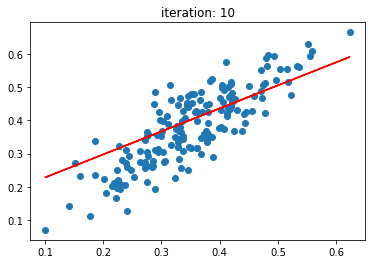

In [21]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred1, 'red')
plt.title("iteration: 10")
plt.savefig('plot_fit_gradient2_minmax.png')

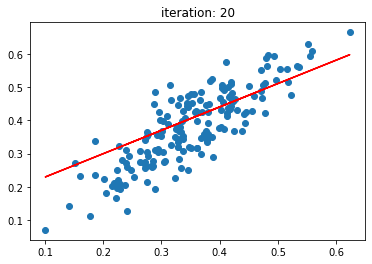

In [22]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred2, 'red')
plt.title("iteration: 20")
plt.savefig('plot_fit_gradient3_minmax.png')

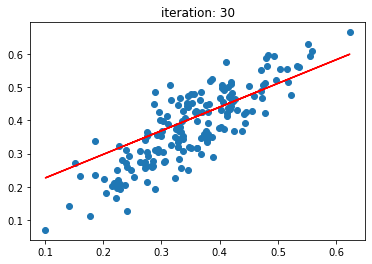

In [23]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred3, 'red')
plt.title("iteration: 30")
plt.savefig('plot_fit_gradient4_minmax.png')

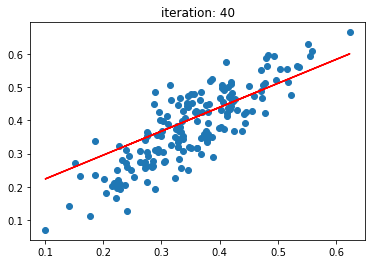

In [24]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred4, 'red')
plt.title("iteration: 40")
plt.savefig('plot_fit_gradient5_minmax.png')

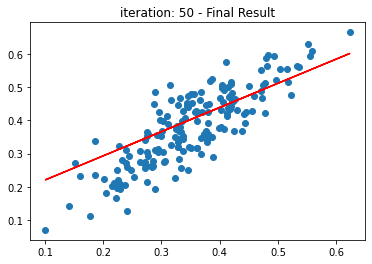

In [25]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred5, 'red')
plt.title("iteration: 50 - Final Result")
plt.savefig('plot_fit_gradient6_minmax.png')

### Z-score normalization 기법을 적용한 gradient 기반 linear regression

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

class LinearRegression:
    def fit(self, X, Y):
        X = np.array(X).reshape(1, -1)
        Y = np.array(Y).reshape(1, -1)
        x_shape = X.shape
        num_var = x_shape[0]
        self.parameter_cache = []
        self.weight = np.random.normal(0,1,(num_var,1))
        self.bias = np.random.rand(1)
        self.num_iteration = 50
        
        for t in range(self.num_iteration):
            N = x_shape[1]
            self.delta_W = 2/N*(np.sum(np.multiply(((np.matmul(self.weight, X)+self.bias)-Y), X)))
            self.delta_bias = 2/N*(np.sum(((np.matmul(self.weight, X)+self.bias)-Y)))
            self.weight -= 0.1*self.delta_W
            self.bias -= 0.1*self.delta_bias
            self.parameter_cache.append(np.array((self.weight, self.bias)))
    
        return self.weight, self.bias, self.parameter_cache
    
    def predict(self, X, idx):
        product = np.matmul(self.parameter_cache[idx][0], np.array(X).reshape(1,-1))+self.parameter_cache[idx][1]
        return product.reshape(-1)
    
reg = LinearRegression()

x = (data['Weight']-data['Weight'].mean())/data['Weight'].std()
y = (data['Height']-data['Height'].mean())/data['Height'].std()

params = reg.fit(x[:-180], y[:-180])
pred0 = reg.predict(np.array(x[-180:]), 0)
pred1 = reg.predict(np.array(x[-180:]), 9)
pred2 = reg.predict(np.array(x[-180:]), 19)
pred3 = reg.predict(np.array(x[-180:]), 29)
pred4 = reg.predict(np.array(x[-180:]), 39)
pred5 = reg.predict(np.array(x[-180:]), 49)
    

/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_14163/2592126670.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.weight, self.bias)))


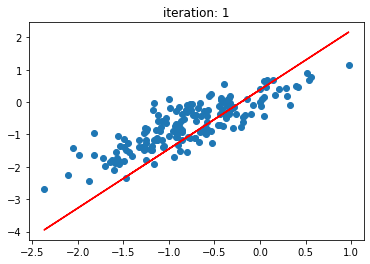

In [27]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred0, 'red')
plt.title("iteration: 1")
plt.savefig('plot_fit_gradient1_zscore.png')

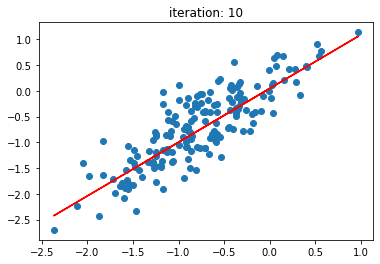

In [28]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred1, 'red')
plt.title("iteration: 10")
plt.savefig('plot_fit_gradient2_zscore.png')

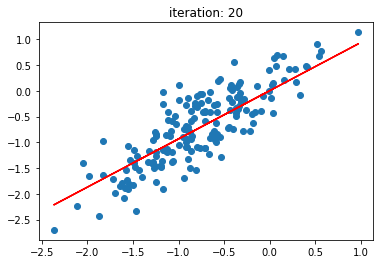

In [29]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred2, 'red')
plt.title("iteration: 20")
plt.savefig('plot_fit_gradient3_zscore.png')

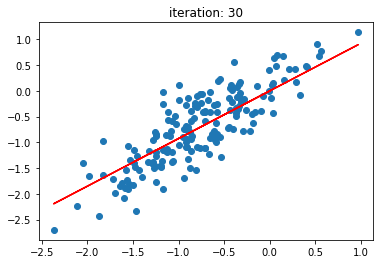

In [30]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred3, 'red')
plt.title("iteration: 30")
plt.savefig('plot_fit_gradient4_zscore.png')

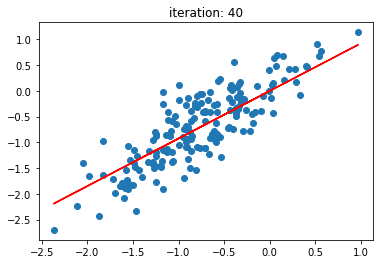

In [31]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred4, 'red')
plt.title("iteration: 40")
plt.savefig('plot_fit_gradient5_zscore.png')

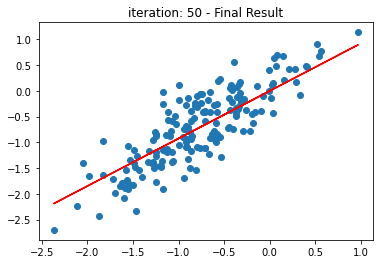

In [32]:
plt.scatter(x[-180:], y[-180:])
plt.plot(x[-180:], pred5, 'red')
plt.title("iteration: 50 - Final Result")
plt.savefig('plot_fit_gradient6_zscore.png')